In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


eda

In [3]:
df.columns = [col.lower().strip() for col in df.columns]
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.shape

(400, 26)

In [6]:
# dropping the 'id' column as it is not useful for analysis
df.drop(columns=['id'], inplace=True)
# renaming all column names for better understanding
df.rename(columns={
    'age': 'age','bp': 'blood_pressure','sg': 'specific_gravity',
    'al': 'albumin','su': 'sugar','rbc': 'red_blood_cells','pc': 'pus_cell','pcc': 'pus_cell_clumps','ba': 'bacteria',
    'bgr': 'blood_glucose_random','bu': 'blood_urea','sc': 'serum_creatinine',
    'sod': 'sodium','pot': 'potassium','hemo': 'haemoglobin','pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count','rc': 'red_blood_cell_count','htn': 'hypertension','dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease','appet': 'appetite',
    'pe': 'pedal_edema','ane': 'anemia','classification': 'target'
}, inplace=True)

df.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,target
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [7]:
print(df.dtypes)

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
target                      object
dtype: object


In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type 
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# extracting categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=[np.number])

In [12]:
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print(categorical_cols[col].unique())
    print("\n")

Column: red_blood_cells
[nan 'normal' 'abnormal']


Column: pus_cell
['normal' 'abnormal' nan]


Column: pus_cell_clumps
['notpresent' 'present' nan]


Column: bacteria
['notpresent' 'present' nan]


Column: hypertension
['yes' 'no' nan]


Column: diabetes_mellitus
['yes' 'no' ' yes' '\tno' '\tyes' nan]


Column: coronary_artery_disease
['no' 'yes' '\tno' nan]


Column: appetite
['good' 'poor' nan]


Column: pedal_edema
['no' 'yes' nan]


Column: anemia
['no' 'yes' nan]


Column: target
['ckd' 'ckd\t' 'notckd']




In [13]:
# replace incorrect values in categorical columns
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no'})
df['target'] = df['target'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print(categorical_cols[col].unique())
    print("\n")

Column: red_blood_cells
[nan 'normal' 'abnormal']


Column: pus_cell
['normal' 'abnormal' nan]


Column: pus_cell_clumps
['notpresent' 'present' nan]


Column: bacteria
['notpresent' 'present' nan]


Column: hypertension
['yes' 'no' nan]


Column: diabetes_mellitus
['yes' 'no' ' yes' nan]


Column: coronary_artery_disease
['no' 'yes' nan]


Column: appetite
['good' 'poor' nan]


Column: pedal_edema
['no' 'yes' nan]


Column: anemia
['no' 'yes' nan]


Column: target
['ckd' 'not ckd']




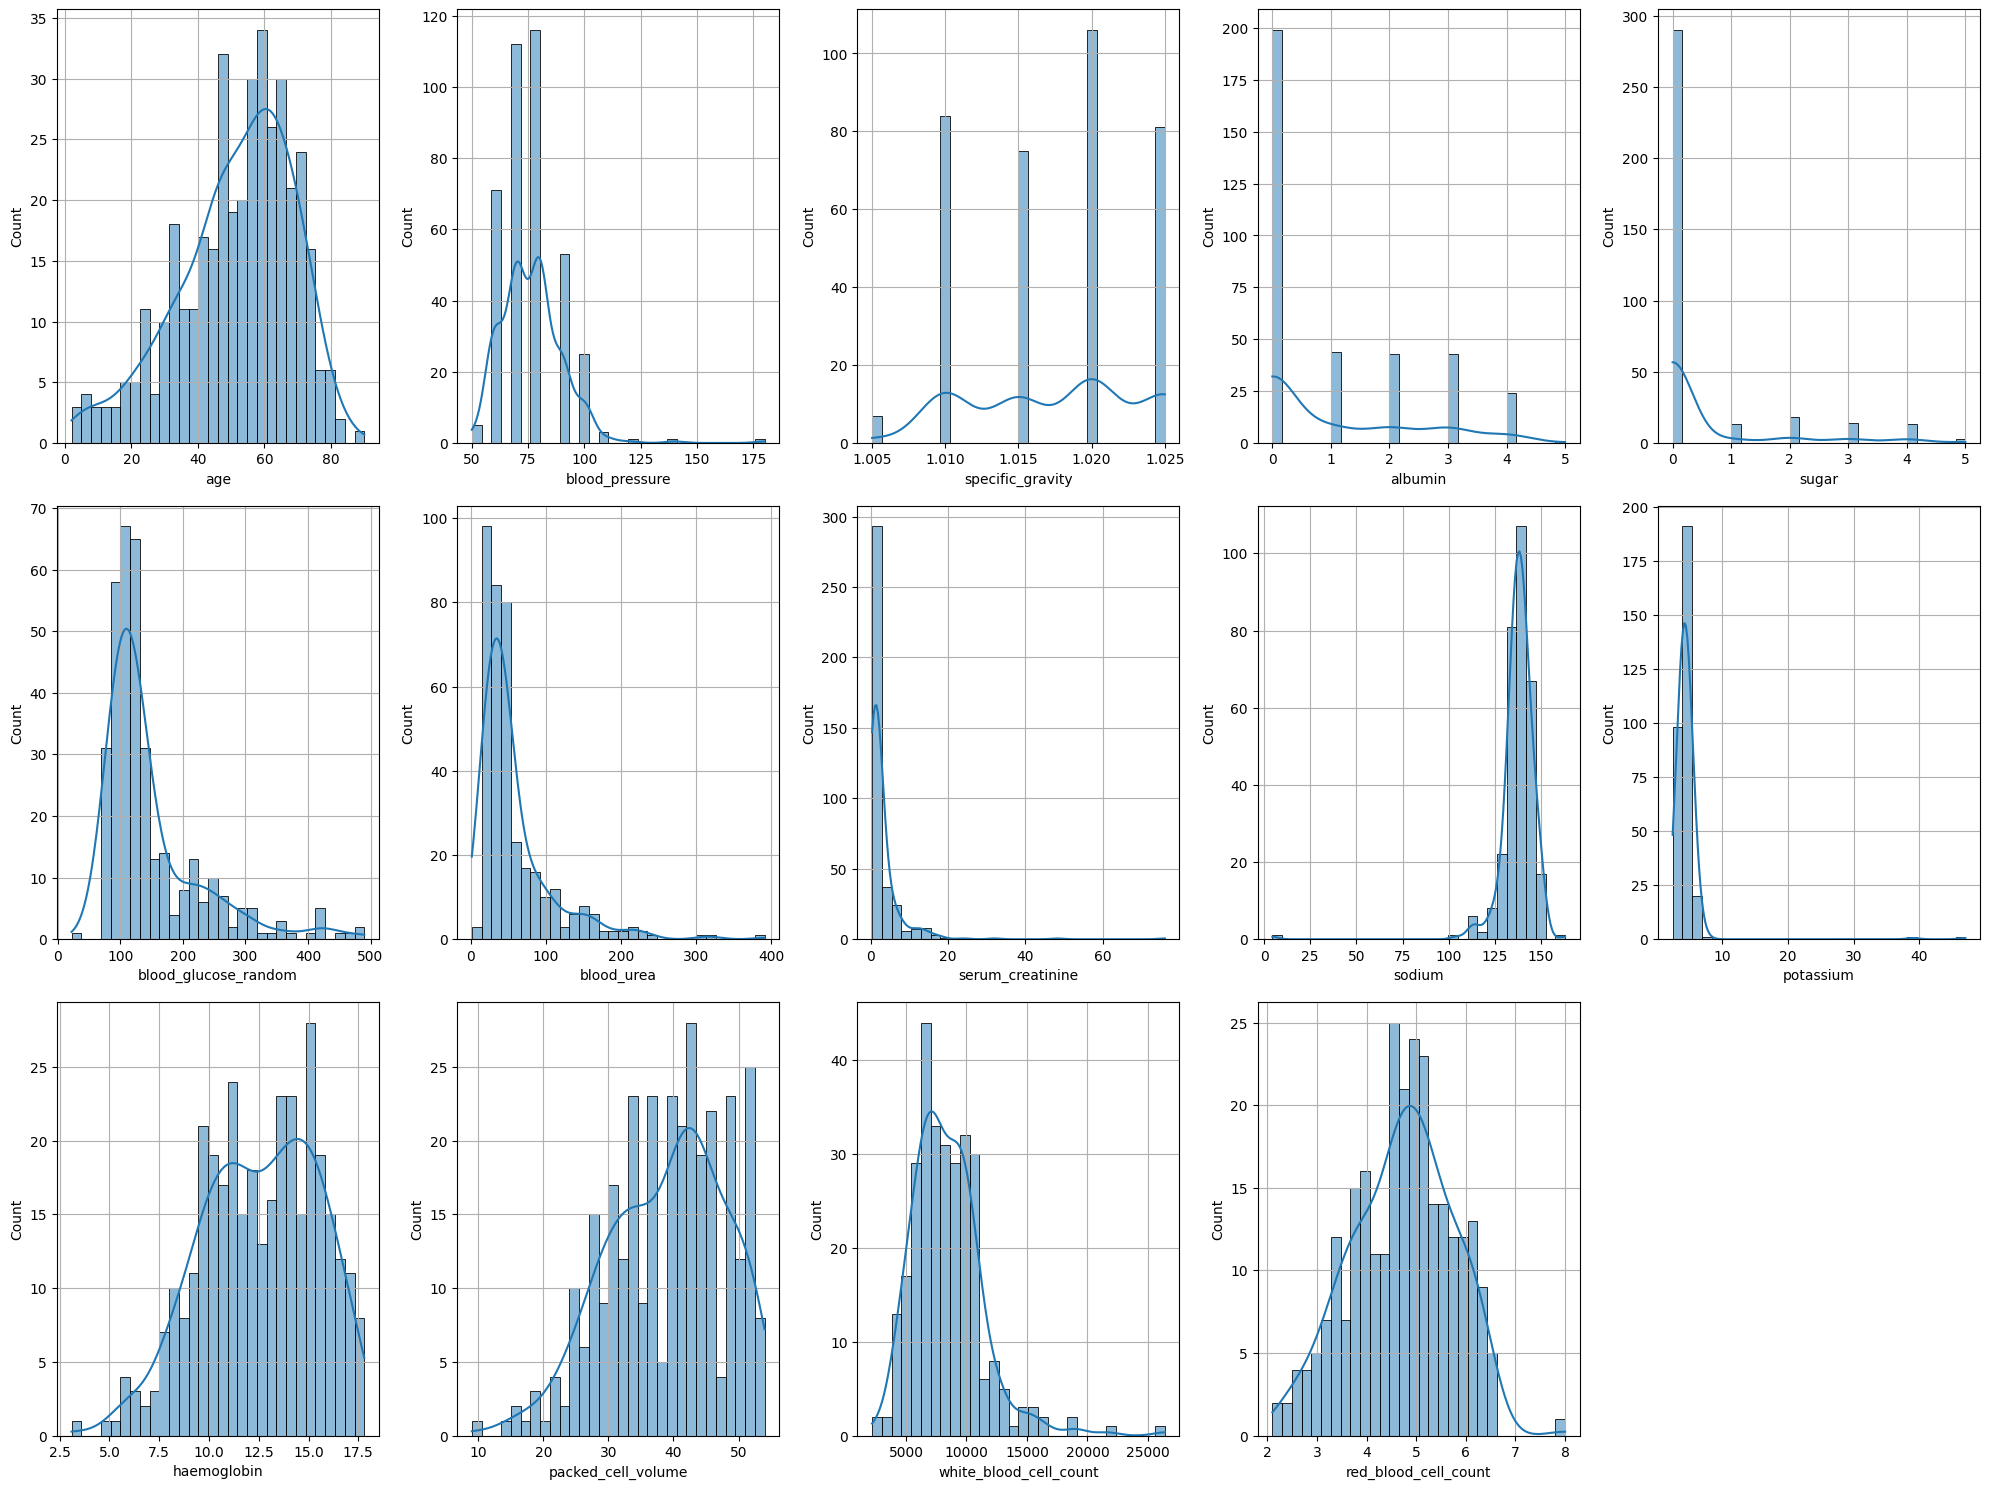

In [25]:
#visualizing the distribution of numerical features
plt.figure(figsize=(20,15))
plotnum=1

for col in numerical_cols:
    if plotnum <= len(numerical_cols.columns):    
        ax = plt.subplot(3, 5,plotnum)
        plt.grid(True)
        sns.histplot(df[col],kde=True, ax=ax, bins=30,alpha=0.5)
        plt.xlabel(col)
    plotnum += 1

plt.tight_layout()
plt.grid(True)
plt.show()

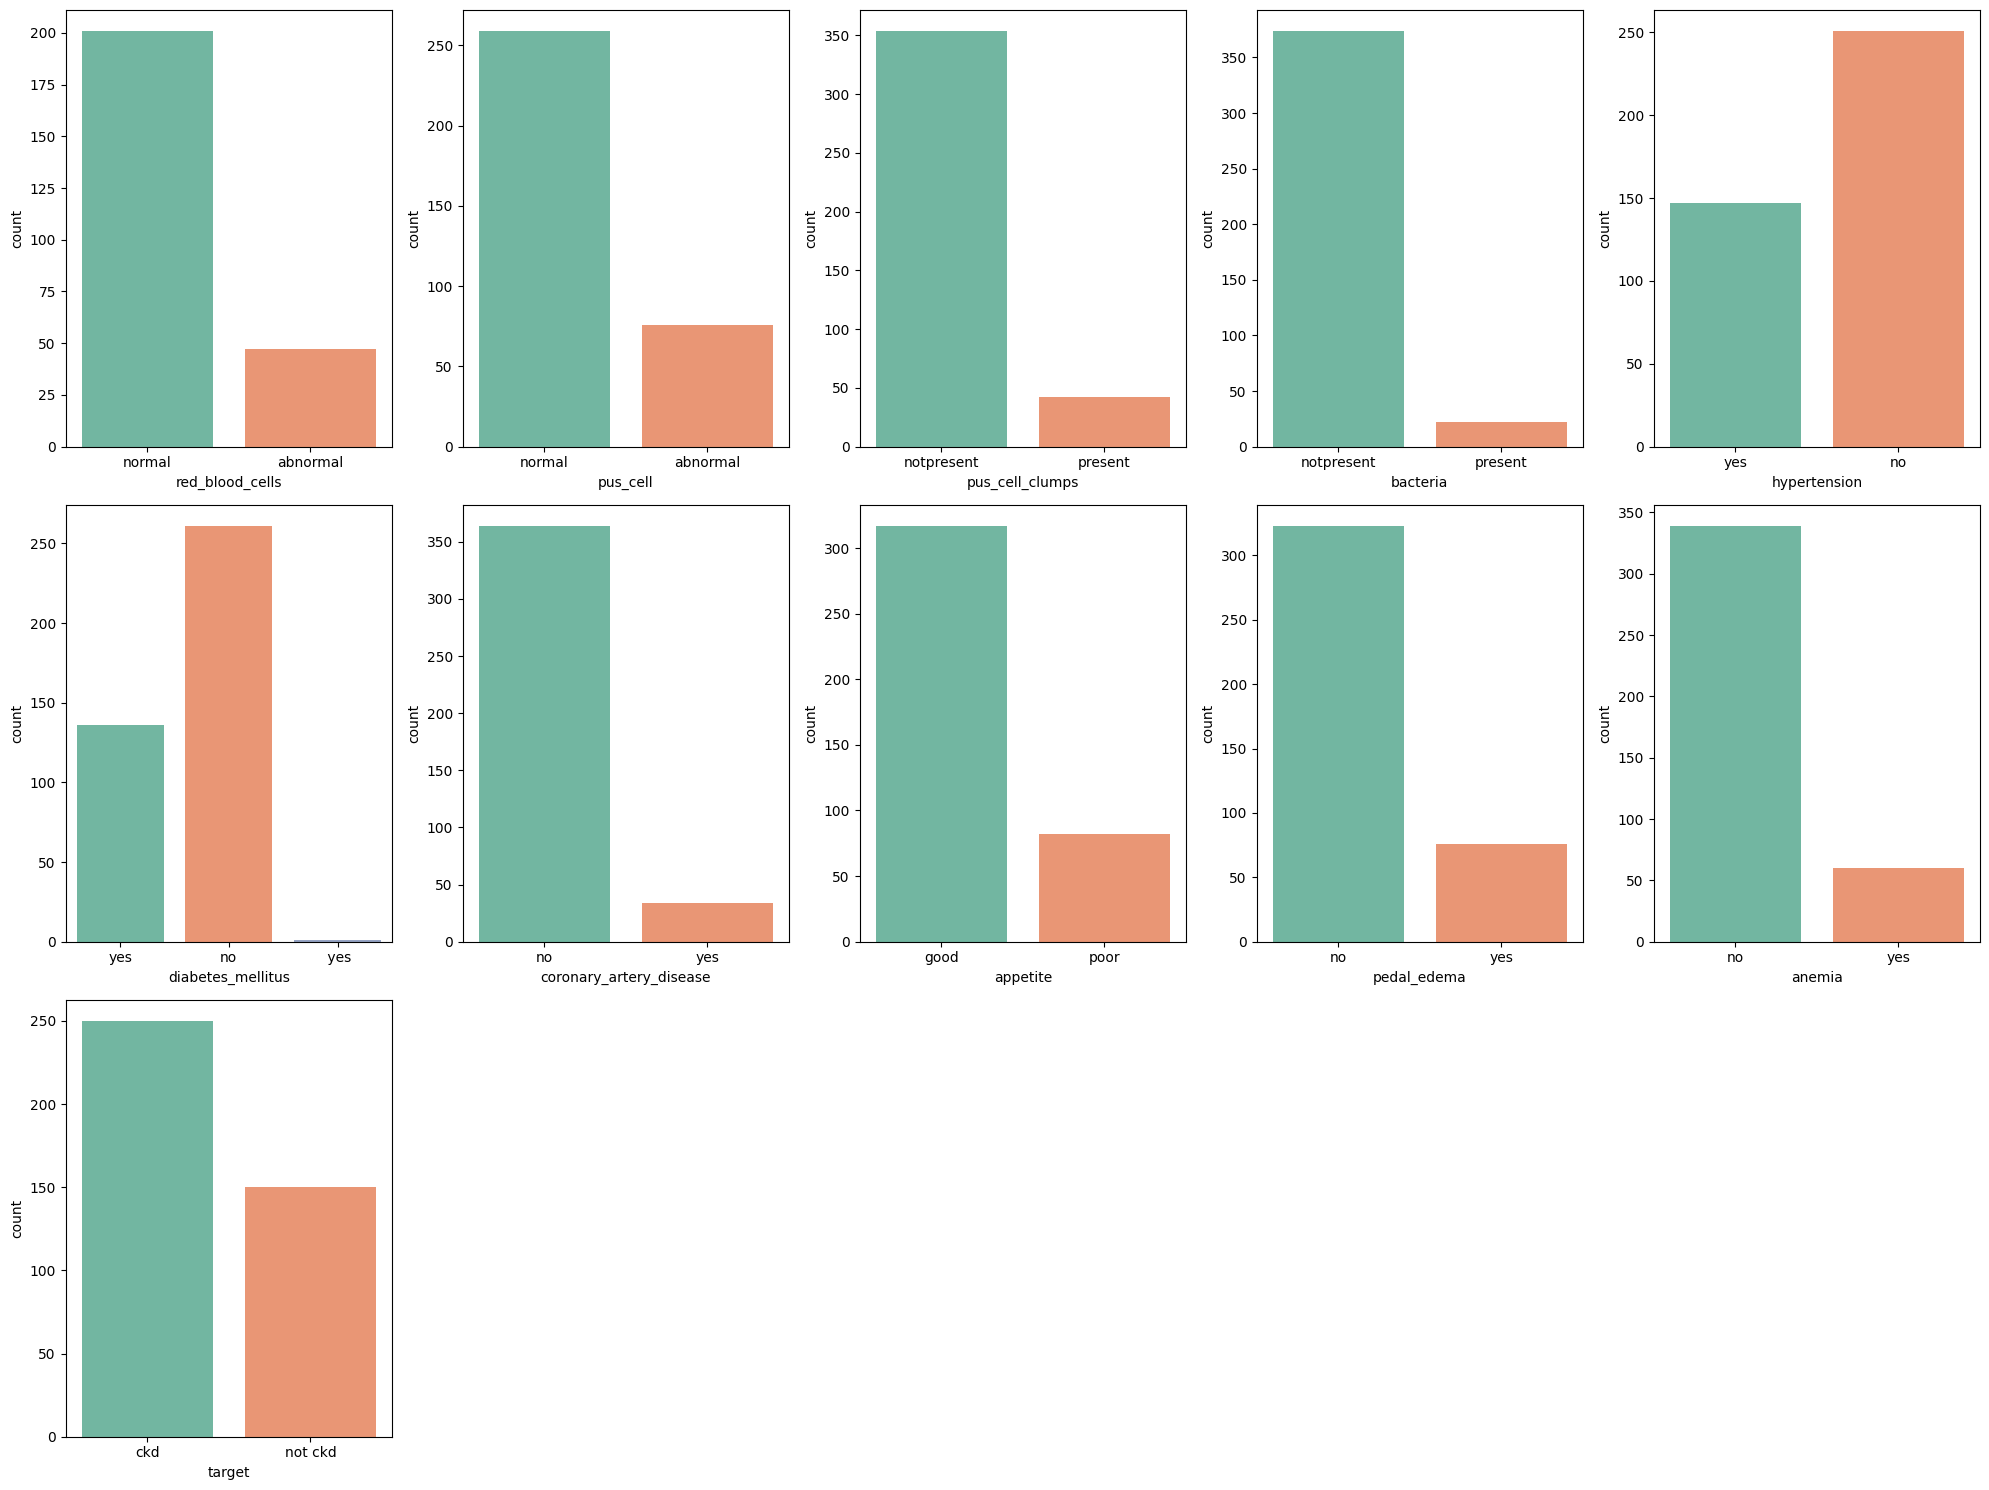

In [32]:
# Visualizing the distribution of categorical features
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_cols.columns, 1):
    plt.subplot(3, 5, i)
    sns.countplot(data=df, x=col,hue=col, palette='Set2',legend=False)
plt.tight_layout()
plt.show()